In [1]:
import os
import pandas as pd
import datetime as dt
import csv
from pathlib import Path

In [2]:
p = Path('/media/data/astamoulakatos/Survey-1-2016/')
folder_list = list(p.glob('*')); folder_list

[]

In [3]:
k = folder_list[0]

IndexError: list index out of range

In [ ]:
k

In [ ]:
list(k.glob('*.asf'))

In [ ]:
dflist = pd.DataFrame()
output = pd.DataFrame()
failures = []
for v in folder_list:
    try:
        video_files = list(v.glob('*.asf'))
        #print(video_files)
        events_file = list(v.glob('*.csv'))
        if events_file == []:
            continue
        else:
            event = events_file[0]
        df = pd.read_csv(event, encoding = 'ISO-8859-1')
        dflist = dflist.append(df)
        num_events = df.index.size
        video1 = [vi.parts[-1] for vi in video_files if 'Ch1' in vi.parts[-1]][0]
        video2 = [vi.parts[-1] for vi in video_files if 'Ch2' in vi.parts[-1]][0]
        video3 = [vi.parts[-1] for vi in video_files if 'Ch3' in vi.parts[-1]][0]
        for i in range(num_events):
            output = output.append({
                'folder': v.parts[-1],
                'video1': video1,
                'video2': video2,
                'video3': video3
            }, ignore_index=True)
        final_df = pd.concat([output.reset_index(drop=True),dflist.reset_index(drop=True)], axis=1)
    except Exception as E:
            failures.append(f)
            print("failure in {f}: {E}".format(f=f, E=E))


In [ ]:
final_df

In [ ]:
video1 = final_df['video1'].tolist()
video2 = final_df['video2'].tolist()
video3 = final_df['video3'].tolist()
timestamps = final_df['VWTimestamp'].tolist()

In [ ]:
# video1 = final_df['video1'].tolist()
# video2 = final_df['video2'].tolist()
# video3 = final_df['video3'].tolist()
# timestamps = final_df['VWTimestamp'].tolist()


start1 = []
start2 = []
start3 = []
for i in range(len(video1)):
    v1 = video1[i][:17]
    v2 = video2[i][:17]
    v3 = video3[i][:17]
    start1.append(v1)
    start2.append(v2)
    start3.append(v3)

offset1 = []
offset2 = []
offset3 = []
for i in range(len(start1)):
    a = dt.datetime(int(start1[i][0:4]),int(start1[i][4:6]),int(start1[i][6:8]),
                    int(start1[i][8:10]),int(start1[i][10:12]),int(start1[i][12:14]),int(start1[i][14:17])*1000)
    b = dflist.iat[i,0]
    b = str(b)
    b = dt.datetime(int(b[0:4]),int(b[4:6]),int(b[6:8]),
                        int(b[8:10]),int(b[10:12]),int(b[12:14]),int(b[14:17])*1000)

    offset1.append((b-a).total_seconds())

    a = dt.datetime(int(start2[i][0:4]),int(start2[i][4:6]),int(start2[i][6:8]),
                    int(start2[i][8:10]),int(start2[i][10:12]),int(start2[i][12:14]),int(start2[i][14:17])*1000)
    offset2.append((b-a).total_seconds())

    a = dt.datetime(int(start3[i][0:4]),int(start3[i][4:6]),int(start3[i][6:8]),
                    int(start3[i][8:10]),int(start3[i][10:12]),int(start3[i][12:14]),int(start3[i][14:17])*1000)

    offset3.append((b-a).total_seconds())

final_df.insert(loc = 2, column = 'offset_Ch1', value = offset1)
final_df.insert(loc = 4, column = 'offset_Ch2', value = offset2)
final_df.insert(loc = 6, column = 'offset_Ch3', value = offset3)


In [ ]:
final_df.T

In [ ]:
df1 = final_df[['folder', 'video1', 'offset_Ch1', 'video2', 'offset_Ch2',
                'video3','offset_Ch3', 'VWTimestamp', 'Description', 'Code', 'KP']]

In [ ]:
final_df.columns

In [ ]:
df1

In [ ]:
df1.to_csv('./frame_extraction_csv_files/survey2016.csv', index=False)

In [5]:
df1 = pd.read_csv('frame_extraction_csv_files/survey2016.csv')

In [6]:
events = df1.Description.value_counts()

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.rcParams['figure.figsize'] = (20,15)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 18}
plt.rc('font', **font)

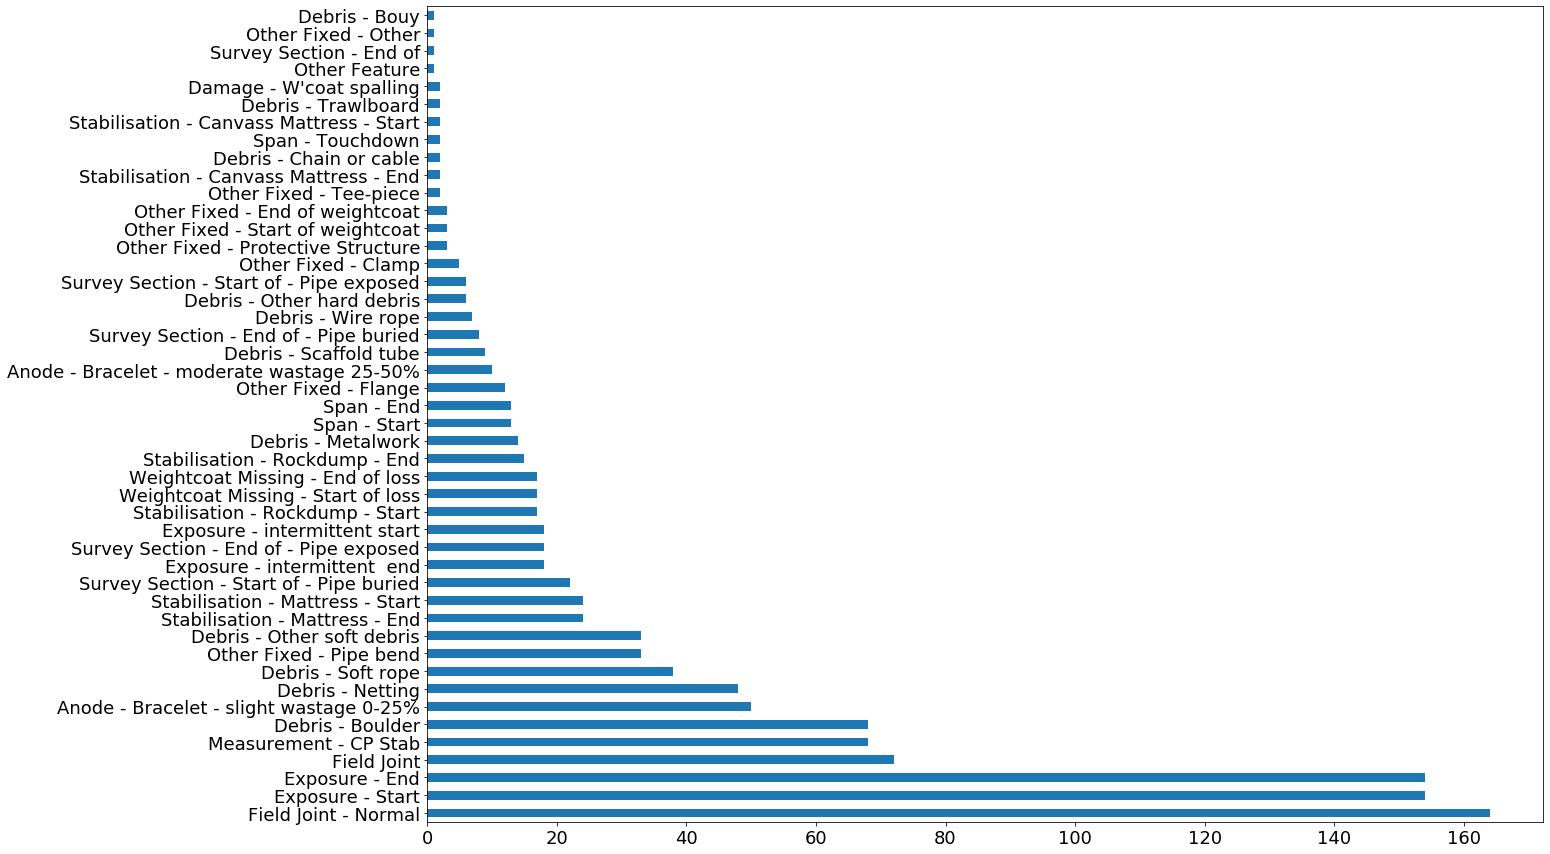

In [9]:
events.plot(kind='barh')

In [10]:
df1.Description.unique()

array(['Exposure - End', 'Field Joint - Normal', 'Exposure - Start',
       'Field Joint', 'Anode - Bracelet - slight wastage 0-25%',
       'Debris - Netting', 'Exposure - intermittent start',
       'Exposure - intermittent  end',
       'Anode - Bracelet - moderate wastage 25-50%', 'Debris - Soft rope',
       'Debris - Boulder', 'Stabilisation - Rockdump - Start',
       'Other Fixed - End of weightcoat', 'Other Fixed - Pipe bend',
       'Other Fixed - Clamp', 'Other Fixed - Flange',
       'Measurement - CP Stab', 'Survey Section - End of - Pipe exposed',
       'Debris - Other soft debris', 'Weightcoat Missing - End of loss',
       'Weightcoat Missing - Start of loss',
       'Stabilisation - Mattress - End',
       'Stabilisation - Mattress - Start', 'Debris - Metalwork',
       'Span - End', 'Span - Start', 'Debris - Other hard debris',
       'Stabilisation - Rockdump - End',
       'Survey Section - End of - Pipe buried',
       'Survey Section - Start of - Pipe buried',
  